# Heart Disease Prediction

#### Imports

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from pandas.core.dtypes.common import is_numeric_dtype
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder


#### Analysis of the data

In [2]:
df = pd.read_csv("heart_disease.csv")

df.head()


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [4]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

There is no null value so it is easy because we don't need to preprocess the data

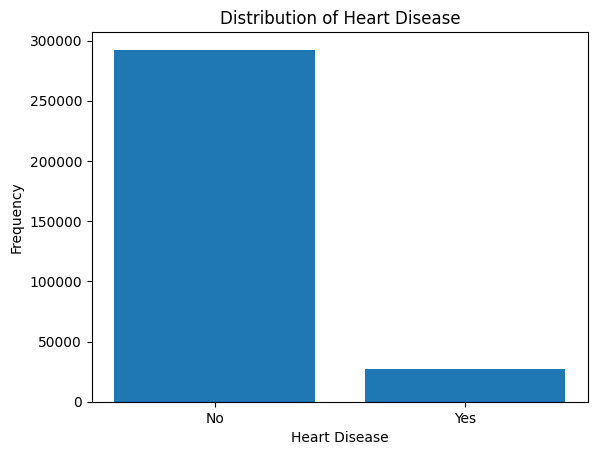

In [5]:
counts = df["HeartDisease"].value_counts()
plt.bar(counts.index, counts.values)
plt.xlabel("Heart Disease")
plt.ylabel("Frequency")
plt.title("Distribution of Heart Disease")
plt.show()



We can see that the data is imbalanced. We will have to deal with this later on.

#### Correlation Matrix

We need to change the column that have Yes and No to 1 and 0 respectively

In [20]:
new_df = df.copy()  # create a copy of the original dataframe

le = LabelEncoder()
for column in new_df.columns:
    if is_numeric_dtype(new_df[column]):
        continue
    new_df[column] = le.fit_transform(new_df[column])


new_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMICategory
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1,3
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0,2
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1,0
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0,0


<Axes: >

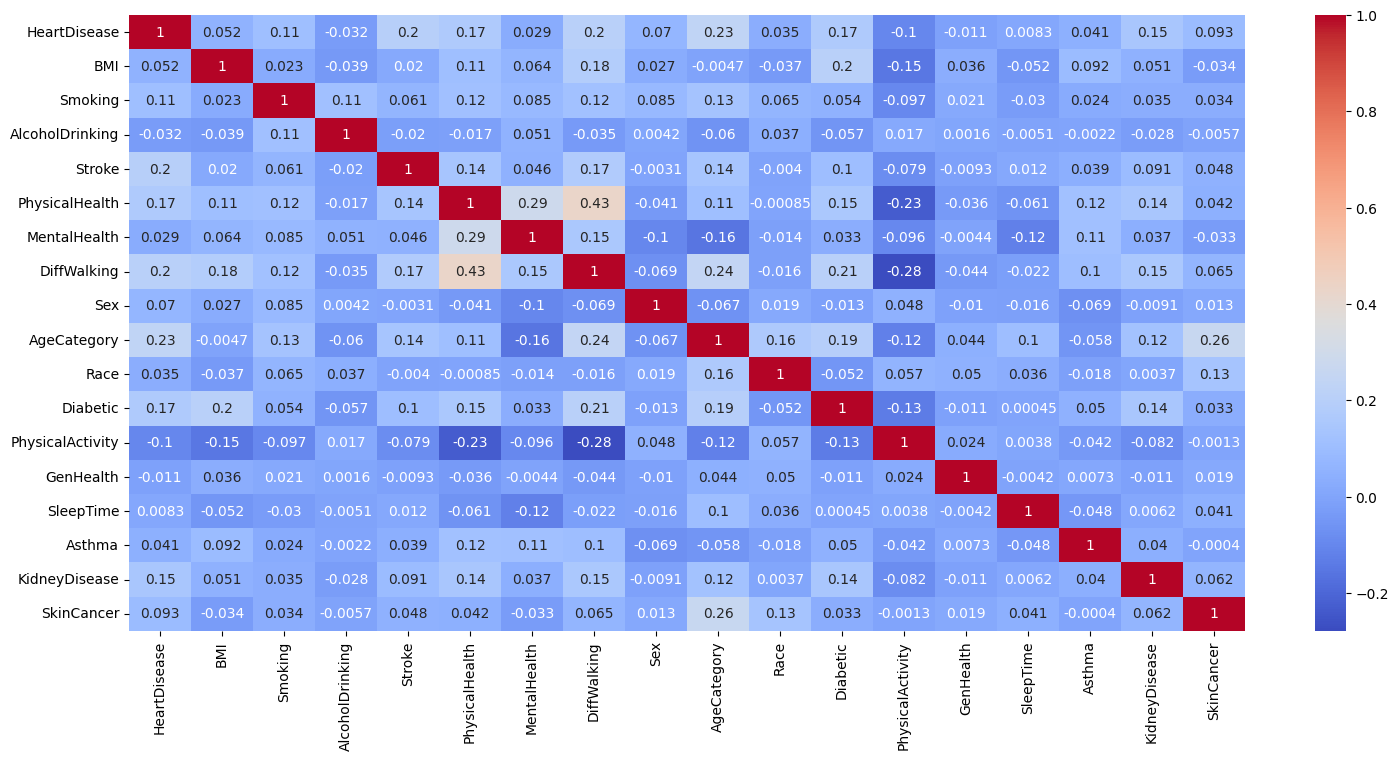

In [8]:
plt.figure(figsize=(18,8))
sns.heatmap(data=new_df.corr(),annot=True,cmap='coolwarm')

Looking at this correlation matrix we see that the variables that are more likely to affect the HeartDisease variable are: Stroke, DiffWalking, AgeCategory, Diabetic and KidneyDisease

### Lets analyze this variables influence in the HeartDisease variable

#### BMI

Text(0, 0.5, 'Percentage of Heart Disease')

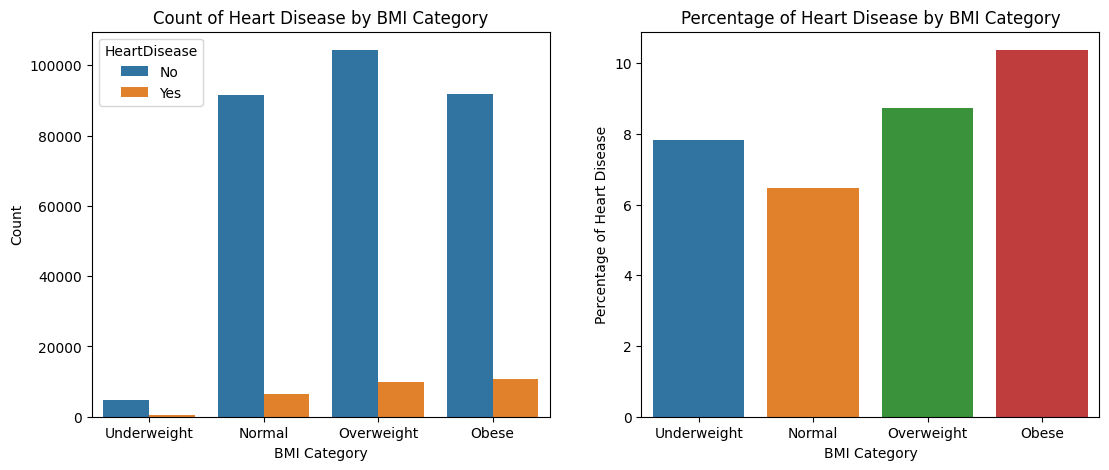

In [27]:
# Create a new column 'BMICategory' based on the BMI values
df['BMICategory'] = pd.cut(df['BMI'], bins=[0, 18.5, 25, 30, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

# Plot the count of 'BMICategory' and 'HeartDisease'
sns.countplot(x='BMICategory', hue='HeartDisease', data=df, ax=ax1)
ax1.set_title('Count of Heart Disease by BMI Category')
ax1.set_xlabel('BMI Category')
ax1.set_ylabel('Count')

# Calculate percentage of 'Yes' values for each BMI category
bmi_heart_disease_perc = df.groupby(['BMICategory', 'HeartDisease'])['HeartDisease'].count().unstack()
bmi_heart_disease_perc['Total'] = bmi_heart_disease_perc.sum(axis=1)
bmi_heart_disease_perc['HeartDisease_Percentage'] = (bmi_heart_disease_perc['Yes'] / bmi_heart_disease_perc['Total']) * 100

sns.barplot(x='BMICategory', y='HeartDisease_Percentage', data=bmi_heart_disease_perc.reset_index(), ax=ax2)
ax2.set_title('Percentage of Heart Disease by BMI Category')
ax2.set_xlabel('BMI Category')
ax2.set_ylabel('Percentage of Heart Disease')


We can see that the people with normal BMI are less affected by heart diseases

#### Stroke

Text(0, 0.5, 'Percentage of Heart Disease Cases')

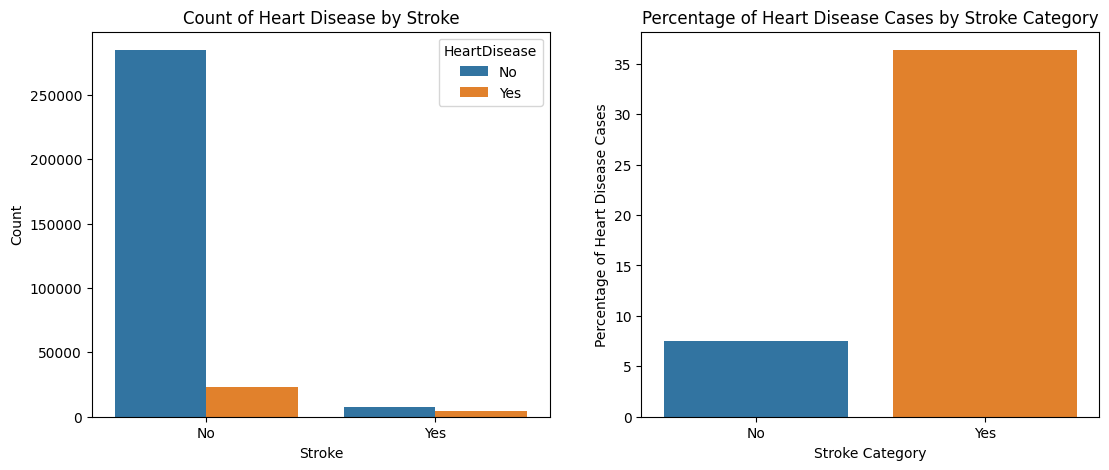

In [28]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

# count plot
sns.countplot(x='Stroke', hue='HeartDisease', data=df, ax=ax1)
ax1.set_title('Count of Heart Disease by Stroke')
ax1.set_xlabel('Stroke')
ax1.set_ylabel('Count')

## percentage of people with heart disease by stroke
perc_stroke = df.groupby('Stroke')['HeartDisease'].value_counts(normalize=True)[:, 'Yes'] * 100

# Create bar plot
sns.barplot(x=perc_stroke.index, y=perc_stroke.values, ax=ax2)
ax2.set_title('Percentage of Heart Disease Cases by Stroke')
ax2.set_xlabel('Stroke')
ax2.set_ylabel('Percentage of Heart Disease Cases')


People that have previously had a stroke are more affected by heart diseases

#### Diff Walking

Text(0, 0.5, 'Percentage of Heart Disease Cases')

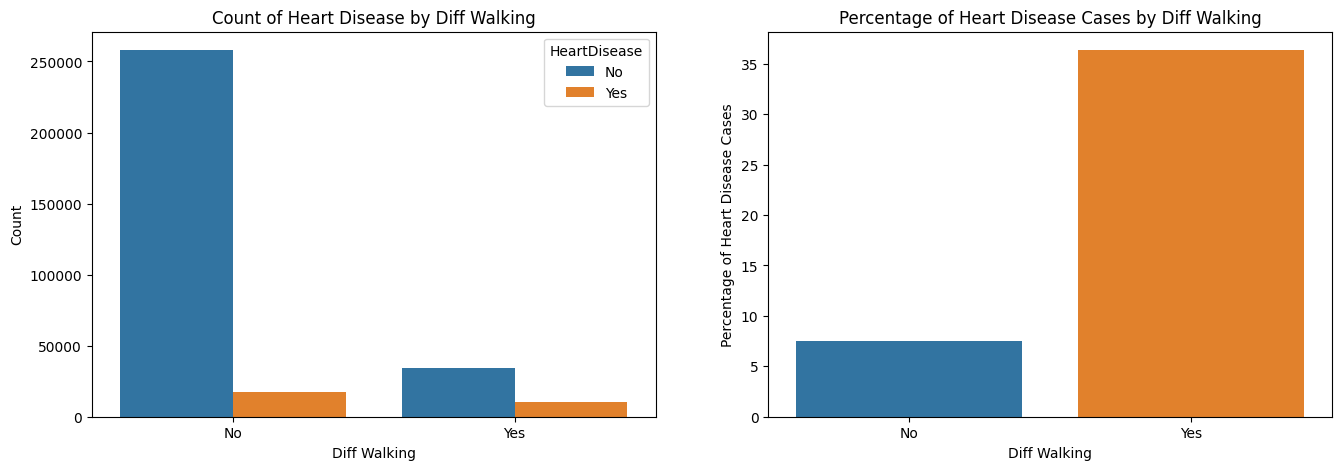

In [34]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

# count plot
sns.countplot(x='DiffWalking', hue='HeartDisease', data=df, ax=ax1)
ax1.set_title('Count of Heart Disease by Diff Walking')
ax1.set_xlabel('Diff Walking')
ax1.set_ylabel('Count')

## percentage of people with heart disease by diff walking
perc_diff = df.groupby('DiffWalking')['HeartDisease'].value_counts(normalize=True)[:, 'Yes'] * 100

# Create bar plot
sns.barplot(x=perc_stroke.index, y=perc_stroke.values, ax=ax2)
ax2.set_title('Percentage of Heart Disease Cases by Diff Walking')
ax2.set_xlabel('Diff Walking')
ax2.set_ylabel('Percentage of Heart Disease Cases')

People that have a different walking are more affected by heart diseases

#### Age Category

Text(0, 0.5, 'Percentage')

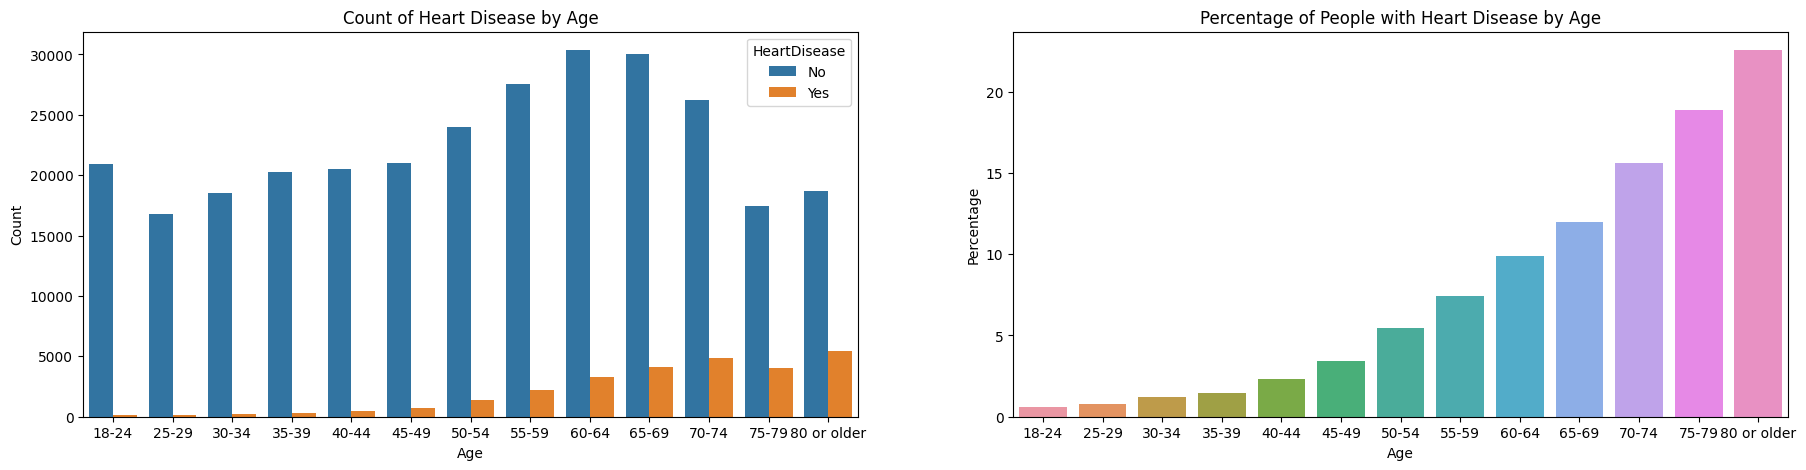

In [43]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 5))

# create a list of the age categories in the desired order
age_order = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older']

# create a categorical variable with the desired order
df['AgeCategory'] = pd.Categorical(df['AgeCategory'], categories=age_order, ordered=True)

# plot count of heart disease by age category
sns.countplot(x='AgeCategory', hue='HeartDisease', data=df, ax=ax1)
ax1.set_title('Count of Heart Disease by Age')
ax1.set_xlabel('Age')
ax1.set_ylabel('Count')

# plot percentage of people with heart disease by age category
age_df = df.groupby('AgeCategory')['HeartDisease'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()
age_df = age_df[age_df['HeartDisease']=='Yes']
sns.barplot(x='AgeCategory', y='Percentage', data=age_df, ax=ax2)
ax2.set_title('Percentage of People with Heart Disease by Age')
ax2.set_xlabel('Age')
ax2.set_ylabel('Percentage')


Older people are more affected by heart diseases

#### Diabetic

Text(0, 0.5, 'Percentage of Heart Disease Cases')

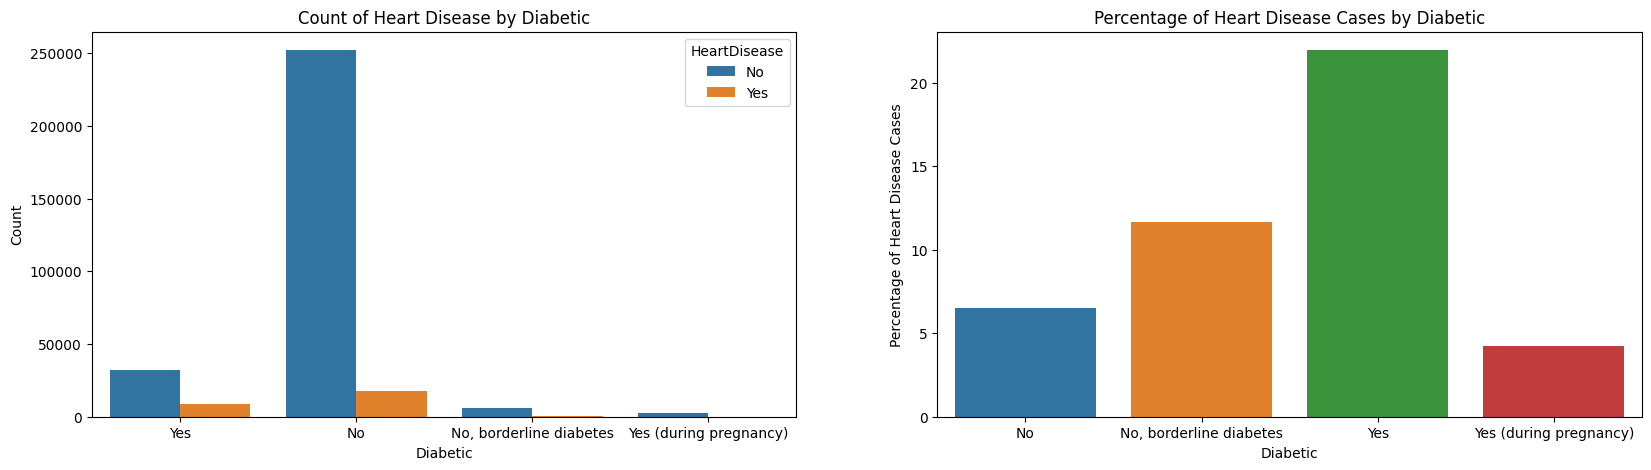

In [44]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

sns.countplot(x='Diabetic', hue='HeartDisease', data=df, ax=ax1)
ax1.set_title('Count of Heart Disease by Diabetic')
ax1.set_xlabel('Diabetic')
ax1.set_ylabel('Count')

# create a grouped dataframe to calculate percentage
perc_stroke = df.groupby('Diabetic')['HeartDisease'].value_counts(normalize=True)[:, 'Yes'] * 100

# Create bar plot
sns.barplot(x=perc_stroke.index, y=perc_stroke.values, ax=ax2)
ax2.set_title('Percentage of Heart Disease Cases by Diabetic')
ax2.set_xlabel('Diabetic')
ax2.set_ylabel('Percentage of Heart Disease Cases')

People with diabetes have more tendency to have heart disease but if this diabetes occurr during pregnancy then the percentage of people with heart disease tendency lowers. However this can be because we have a very small data of this type of people. The same with borderline diabetes.

#### Kidney Disease

Text(0, 0.5, 'Percentage of Heart Disease Cases')

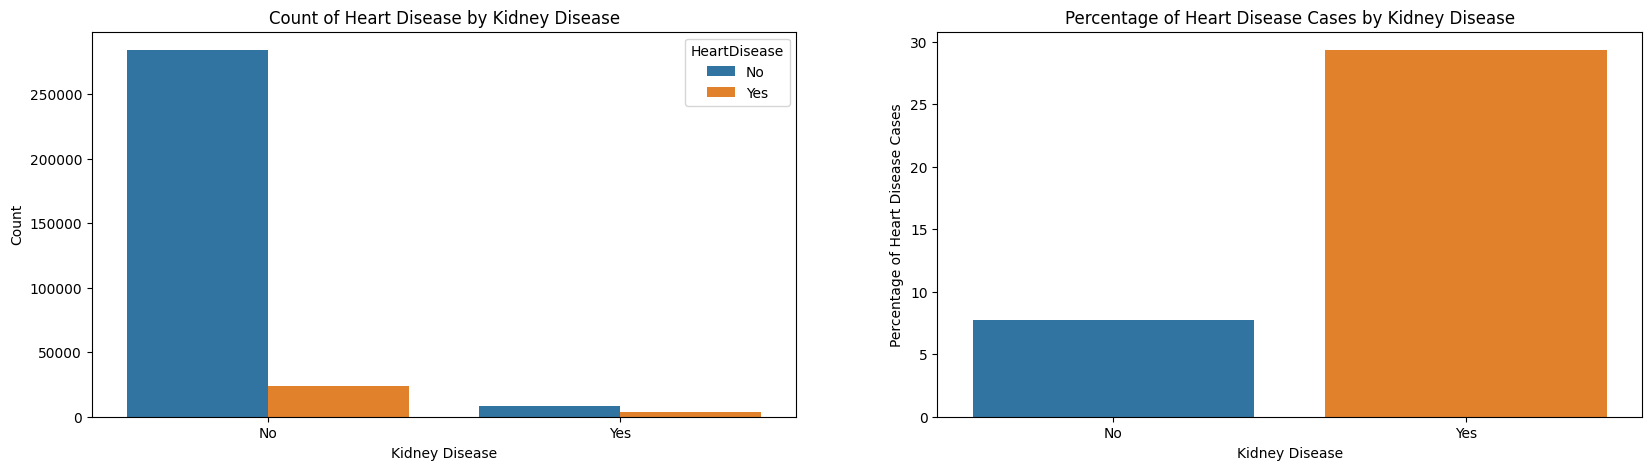

In [45]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

sns.countplot(x='KidneyDisease', hue='HeartDisease', data=df, ax=ax1)
ax1.set_title('Count of Heart Disease by Kidney Disease')
ax1.set_xlabel('Kidney Disease')
ax1.set_ylabel('Count')

# create a grouped dataframe to calculate percentage
perc_stroke = df.groupby('KidneyDisease')['HeartDisease'].value_counts(normalize=True)[:, 'Yes'] * 100

# Create bar plot
sns.barplot(x=perc_stroke.index, y=perc_stroke.values, ax=ax2)
ax2.set_title('Percentage of Heart Disease Cases by Kidney Disease')
ax2.set_xlabel('Kidney Disease')
ax2.set_ylabel('Percentage of Heart Disease Cases')

It seems like kidney disease make people more likely to have a heart disease

#### Decision Tree

In [18]:
# Separate the target variable from predictors
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Convert categorical variables into numerical using one-hot encoding
X = pd.get_dummies(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the DecisionTreeClassifier model
clf = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
clf.fit(X_train, y_train)

# Predict the target variable for the testing data
y_pred = clf.predict(X_test)

# Evaluate the model's accuracy on the testing data
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.862505667693366


(array([2., 1., 1., 0., 0., 0., 3., 1., 1., 1.]),
 array([0.86239978, 0.86273875, 0.86307771, 0.86341668, 0.86375564,
        0.86409461, 0.86443358, 0.86477254, 0.86511151, 0.86545047,
        0.86578944]),
 <BarContainer object of 10 artists>)

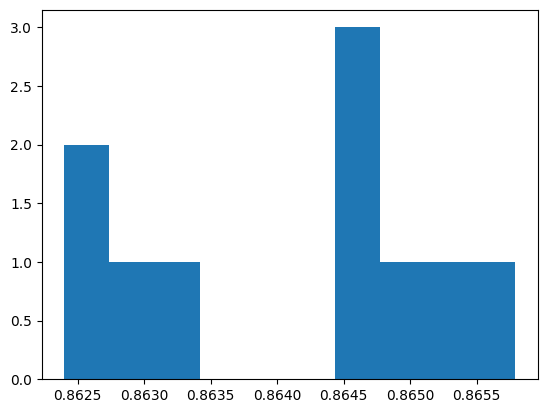

In [46]:
model_accuracies = []

for repetition in range(10):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    
    # Create the classifier
    clf = DecisionTreeClassifier()

    # Fit the model on the training data
    clf.fit(X_train, y_train)

    # Predict the target variable for the testing data
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    model_accuracies.append(accuracy)

plt.hist(model_accuracies)